First 5 Rows:
         State  Median_Income
0     Alabama        62212.0
1      Alaska        86631.0
2     Arizona        77315.0
3    Arkansas        58700.0
4  California        95521.0 

Summary Statistics:
        Median_Income
count      52.000000
mean    76589.519231
std     14668.122172
min     25621.000000
25%     69023.500000
50%     74631.500000
75%     85472.250000
max    108210.000000 

Average Median Income: $76,589.52

Top 5 States by Median Income:
                    State  Median_Income
8   District of Columbia       108210.0
21         Massachusetts        99858.0
30            New Jersey        99781.0
20              Maryland        98678.0
29         New Hampshire        96838.0

Bottom 5 States by Median Income:
             State  Median_Income
51    Puerto Rico        25621.0
24    Mississippi        54203.0
48  West Virginia        55948.0
18      Louisiana        58229.0
3        Arkansas        58700.0


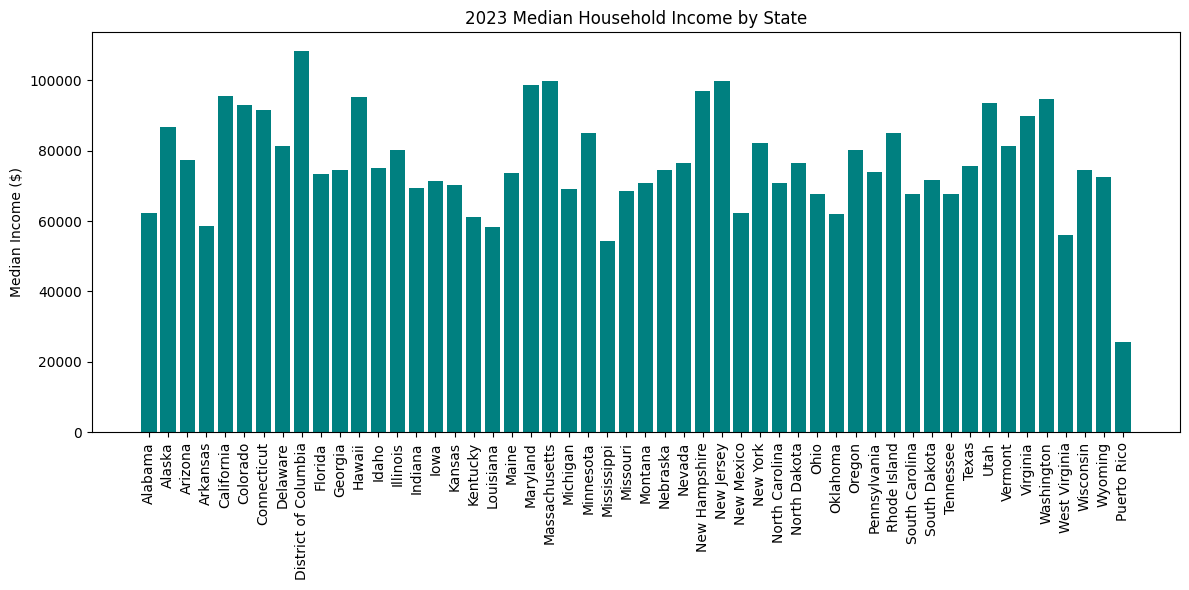

In [7]:
# Census Income Analysis (2023)
# Analyzes median household income by state from ACS 2023 data
# Author: Raymond Cirko | GitHub: github.com/RayCirko/Census-Income

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('income_by_state_2023.csv', skiprows=1)  # Skip header row
df = df[['Geographic Area Name', 'Estimate!!Households!!Median income (dollars)']]  # Keep state and income
df = df.rename(columns={'Geographic Area Name': 'State', 'Estimate!!Households!!Median income (dollars)': 'Median_Income'})  # Simplify names
df['Median_Income'] = df['Median_Income'].replace('[\\$,]', '', regex=True).astype(float)  # Remove $ and convert to float
df.dropna(inplace=True)  # Remove nulls

# Preview data
print("First 5 Rows:\n", df.head(), "\n")
print("Summary Statistics:\n", df.describe(), "\n")

# Analyze: average, top 5, bottom 5
avg_income = df['Median_Income'].mean()
top_5 = df.nlargest(5, 'Median_Income')
bottom_5 = df.nsmallest(5, 'Median_Income')

print(f"Average Median Income: ${avg_income:,.2f}")
print("\nTop 5 States by Median Income:\n", top_5[['State', 'Median_Income']])
print("\nBottom 5 States by Median Income:\n", bottom_5[['State', 'Median_Income']])

# Visualize: Bar plot of all states (similar to original)
plt.figure(figsize=(12, 6))  # Wider figure for readability
plt.bar(df['State'], df['Median_Income'], color='teal')  # Teal bars like before
plt.xticks(rotation=90)  # Rotate labels
plt.ylabel('Median Income ($)')
plt.title('2023 Median Household Income by State')
plt.tight_layout()  # Adjust layout
plt.savefig('income_by_state.png')  # Save for GitHub
plt.show()

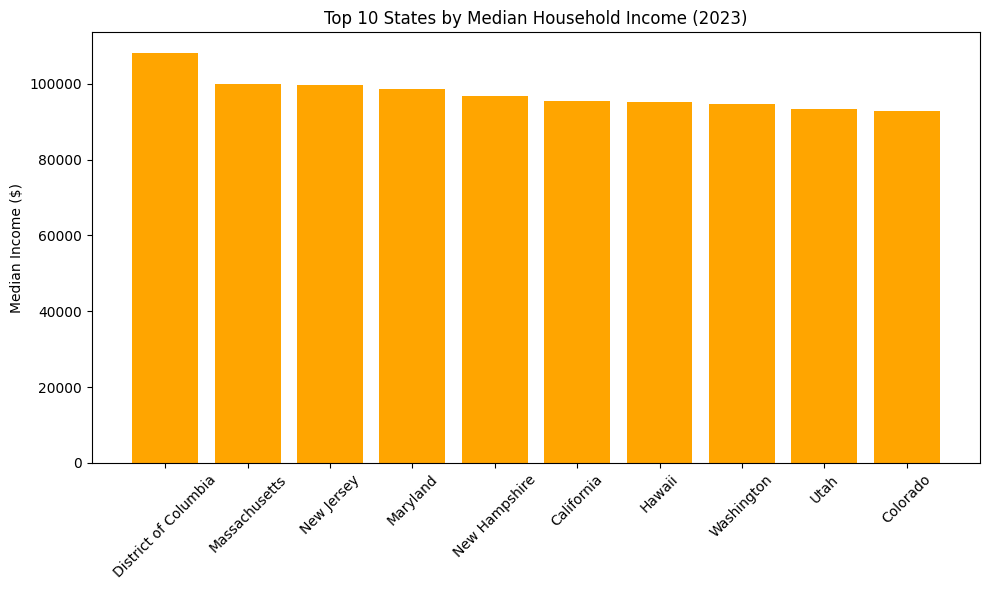

In [10]:
top_10 = df.nlargest(10, 'Median_Income')
plt.figure(figsize=(10, 6))
plt.bar(top_10['State'], top_10['Median_Income'], color='orange')
plt.xticks(rotation=45)
plt.ylabel('Median Income ($)')
plt.title('Top 10 States by Median Household Income (2023)')
plt.tight_layout()
plt.savefig('top_10_income_by_state.png')
plt.show()